In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.constants as const
from scipy.spatial.transform import Rotation as R
from matplotlib import rcParams
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MaxNLocator
plt.style.use('science')
rcParams['axes.linewidth'] = 2
import ChiantiPy.core as ch


 ChiantiPy version 0.11.0 
 found PyQt5 widgets
 using PyQt5 widgets


In [2]:
ace_mag_df = pd.read_csv("../src/obs/ACE_MAG_Data_1.txt",skiprows=42,sep="\s+")
ace_mag_df
cols=["year","day","hr"]
ace_mag_df['dateobs'] = ace_mag_df[cols].apply(lambda x: '/'.join(x.values.astype(str)), axis="columns")
ace_mag_df["dateobs"] = pd.to_datetime(ace_mag_df["dateobs"],format="%Y/%j/%H")
ace_mag_df = ace_mag_df.set_index("dateobs")
ace_mag_df

,year,day,hr,Bgse_x,Bgse_y,Bgse_z
dateobs,,,,,,
2005-05-12 00:00:00,2005,132,0,2.389,4.638,3.936
2005-05-12 01:00:00,2005,132,1,2.422,3.302,1.664
2005-05-12 02:00:00,2005,132,2,-0.324,0.103,-4.710
2005-05-12 03:00:00,2005,132,3,3.002,3.781,-1.130
2005-05-12 04:00:00,2005,132,4,3.190,1.555,4.082
...,...,...,...,...,...,...
2005-05-18 19:00:00,2005,138,19,-0.827,7.481,2.910
2005-05-18 20:00:00,2005,138,20,0.145,6.900,4.085
2005-05-18 21:00:00,2005,138,21,-1.017,6.892,3.597


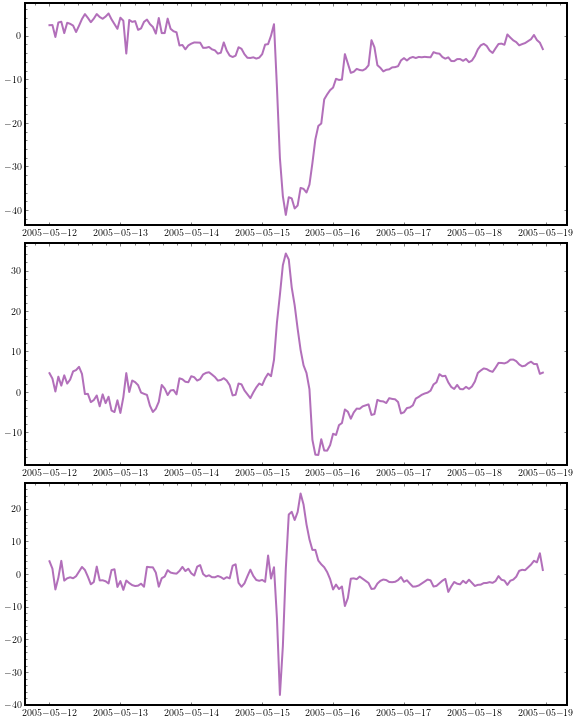

In [3]:
fig, axes = plt.subplots(3,1,figsize=(8,10),constrained_layout=True)
axes[0].plot(ace_mag_df.index,ace_mag_df["Bgse_x"],lw=2,color="#B26FBA")
axes[1].plot(ace_mag_df.index,ace_mag_df["Bgse_y"],lw=2,color="#B26FBA")
axes[2].plot(ace_mag_df.index,ace_mag_df["Bgse_z"],lw=2,color="#B26FBA")



In [4]:
ace_plasma_df =  pd.read_csv("../src/obs/AC_H2_SWE_177745.csv",comment="#",header=0,
names = ["dateobs","n_p","v_tot","t_p","vx","vy","vz"])
ace_plasma_df["dateobs"] = pd.to_datetime(ace_plasma_df["dateobs"])
ace_plasma_df = ace_plasma_df.set_index("dateobs")
ace_plasma_df

,n_p,v_tot,t_p,vx,vy,vz
dateobs,,,,,,
2005-05-12 00:00:00+00:00,6.3470,479.54,132264.0,-479.236,-0.694,10.871
2005-05-12 01:00:00+00:00,5.9736,481.20,147829.0,-479.851,-19.954,-3.355
2005-05-12 02:00:00+00:00,5.5014,498.43,184011.0,-494.293,-55.895,-24.744
2005-05-12 03:00:00+00:00,5.2384,469.48,169804.0,-468.390,-20.071,-14.316
2005-05-12 04:00:00+00:00,5.2527,472.69,155973.0,-471.527,-28.897,9.748
...,...,...,...,...,...,...
2005-05-23 20:00:00+00:00,4.2311,440.18,128513.0,-439.503,-16.447,9.355
2005-05-23 21:00:00+00:00,4.3287,436.68,102272.0,-435.268,-24.621,20.920
2005-05-23 22:00:00+00:00,4.3457,444.00,81069.9,-442.336,-31.760,18.781


In [5]:
ace_comp_df = pd.read_csv("../src/obs/AC_H2_SWI_262038.csv",comment="#",header=0,
names = ["dateobs","c6_c4","c6_c4_err","c6_c4_flag","c6_c5","c6_c5_err","c6_c5_flag",
"o7_o6","o7_o6_err","o7_o6_flag"])
ace_comp_df = ace_comp_df.loc[(ace_comp_df["c6_c4_flag"] == 0) & (ace_comp_df["c6_c5_flag"] == 0) & (ace_comp_df["o7_o6_flag"] == 0)]
ace_comp_df["dateobs"] = pd.to_datetime(ace_comp_df["dateobs"])
ace_comp_df = ace_comp_df.set_index("dateobs")
ace_comp_df

,c6_c4,c6_c4_err,c6_c4_flag,c6_c5,c6_c5_err,c6_c5_flag,o7_o6,o7_o6_err,o7_o6_flag
dateobs,,,,,,,,,
2005-05-12 00:34:49+00:00,1.6850,0.116010,0,0.83225,0.042091,0,0.14197,0.006503,0
2005-05-12 01:34:52+00:00,2.0421,0.150640,0,0.66066,0.031550,0,0.12909,0.006004,0
2005-05-12 02:34:54+00:00,1.3654,0.084132,0,0.77847,0.037321,0,0.10022,0.005047,0
2005-05-12 03:34:57+00:00,1.6882,0.102950,0,0.88191,0.040445,0,0.14367,0.006573,0
2005-05-12 04:35:00+00:00,2.3487,0.179400,0,0.76113,0.037225,0,0.14153,0.006608,0
...,...,...,...,...,...,...,...,...,...
2005-05-23 19:48:31+00:00,4.0461,0.510450,0,1.10410,0.074820,0,0.19934,0.011782,0
2005-05-23 20:48:33+00:00,2.1907,0.247090,0,0.93941,0.071881,0,0.18680,0.011121,0
2005-05-23 21:48:36+00:00,4.1776,0.663240,0,1.27120,0.111510,0,0.20020,0.014508,0


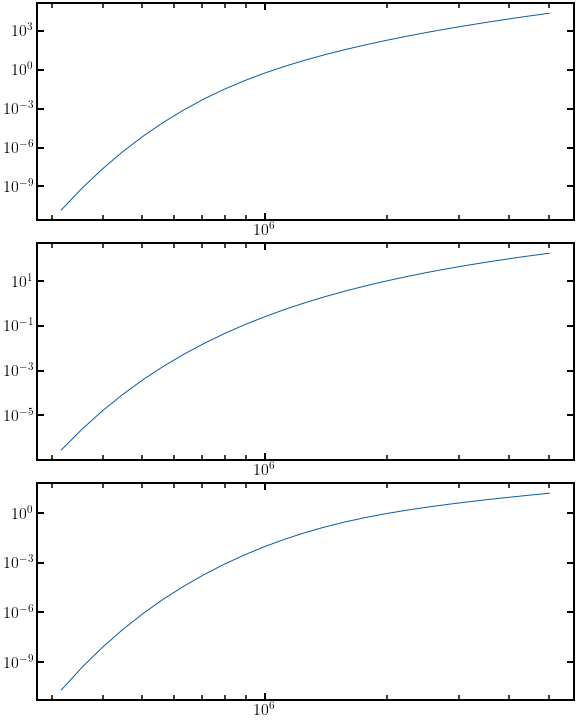

In [44]:
carbon_charge_stat = ch.ioneq("c")
carbon_charge_stat.load()
c4_fraction = carbon_charge_stat.Ioneq[4,30:55]
c5_fraction = carbon_charge_stat.Ioneq[5,30:55]
c6_fraction = carbon_charge_stat.Ioneq[6,30:55]
carbon_temp = carbon_charge_stat.Temperature[30:55]

oxygen_charge_stat = ch.ioneq("o")
oxygen_charge_stat.load()
o7_fraction = oxygen_charge_stat.Ioneq[7,30:55]
o6_fraction = oxygen_charge_stat.Ioneq[6,30:55]
oxygen_temp = oxygen_charge_stat.Temperature[30:55]

fig, axes = plt.subplots(3,1,figsize=(8,10),constrained_layout=True)

axes[0].plot(carbon_temp,c6_fraction/c4_fraction)
axes[1].plot(carbon_temp,c6_fraction/c5_fraction)
axes[2].plot(oxygen_temp,o7_fraction/o6_fraction)

for ax_ in axes:
    ax_.set_xscale("log")
    ax_.set_yscale("log")

In [47]:
oxygen_temp

array([ 316227.76601684,  354813.38923358,  398107.1705535 ,
        446683.59215096,  501187.23362727,  562341.32519035,
        630957.34448019,  707945.78438414,  794328.23472428,
        891250.93813375, 1000000.        , 1122018.45430196,
       1258925.41179417, 1412537.54462276, 1584893.19246111,
       1778279.41003892, 1995262.31496888, 2238721.13856834,
       2511886.43150958, 2818382.93126445, 3162277.66016838,
       3548133.89233575, 3981071.70553497, 4466835.92150963,
       5011872.33627272])

In [53]:
ace_plasma_all_df =  pd.read_csv("../src/obs/ACE_SWICS_QdistData.txt",sep="\s+",header=None,skiprows=30,
names = ["year","day","hr","min","sec","c4","c5","c6","o5","o6","o7","o8","ne8","ne9","mg6","mg7","mg8","mg9","mg10","mg11","mg12",
"si6","si7","si8","si9","si10","si11","si12","fe6","fe7","fe8","fe9","fe10","fe11","fe12","fe13","fe14","fe15","fe16","fe17","fe18",
"fe19","fe20","c4_err","c5_err","c6_err","o5_err","o6_err","o7_err","o8_err","ne8_err","ne9_err","mg6_err","mg7_err","mg8_err","mg9_err","mg10_err","mg11_err","mg12_err",
"si6_err","si7_err","si8_err","si9_err","si10_err","si11_err","si12_err","fe6_err","fe7_err","fe8_err","fe9_err","fe10_err","fe11_err","fe12_err","fe13_err","fe14_err","fe15_err","fe16_err","fe17_err","fe18_err",
"fe19_err","fe20_err","c4_flag","c5_flag","c6_flag","o5_flag","o6_flag","o7_flag","o8_flag","ne8_flag","ne9_flag","mg6_flag","mg7_flag","mg8_flag","mg9_flag","mg10_flag","mg11_flag","mg12_flag",
"si6_flag","si7_flag","si8_flag","si9_flag","si10_flag","si11_flag","si12_flag","fe6_flag","fe7_flag","fe8_flag","fe9_flag","fe10_flag","fe11_flag","fe12_flag","fe13_flag","fe14_flag","fe15_flag","fe16_flag","fe17_flag","fe18_flag",
"fe19_flag","fe20_flag"])

cols=["year","day","hr","min","sec"]
ace_plasma_all_df['dateobs'] = ace_plasma_all_df[cols].apply(lambda x: '/'.join(x.values.astype(int).astype(str)), axis="columns")
ace_plasma_all_df["dateobs"] = pd.to_datetime(ace_plasma_all_df["dateobs"],format="%Y/%j/%H/%M/%S")
ace_plasma_all_df = ace_plasma_all_df.set_index("dateobs")


ace_plasma_all_df

,year,day,hr,min,sec,c4,c5,c6,o5,o6,...,fe11_flag,fe12_flag,fe13_flag,fe14_flag,fe15_flag,fe16_flag,fe17_flag,fe18_flag,fe19_flag,fe20_flag
dateobs,,,,,,,,,,,,,,,,,,,,,
2005-05-14 01:37:09,2005,134,1,37,9.408,0.090997,0.318410,0.590590,0.017896,0.766480,...,0,0,0,0,0,0,0,0,0,0
2005-05-14 03:37:15,2005,134,3,37,15.168,0.100870,0.306320,0.592800,0.024095,0.804200,...,0,0,0,0,0,0,0,0,0,0
2005-05-14 05:37:20,2005,134,5,37,20.928,0.118940,0.374500,0.506560,0.007777,0.742080,...,0,0,0,0,0,0,0,0,0,0
2005-05-14 07:37:25,2005,134,7,37,25.824,0.187800,0.280680,0.531520,0.006667,0.773410,...,0,0,0,0,0,0,0,0,0,0
2005-05-14 09:37:31,2005,134,9,37,31.584,0.131030,0.405540,0.463430,0.018956,0.804290,...,0,0,0,0,0,0,0,0,0,0
2005-05-14 11:37:38,2005,134,11,37,38.208,0.115880,0.299680,0.584430,0.022849,0.738400,...,0,0,0,0,0,0,0,0,0,0
2005-05-14 13:37:43,2005,134,13,37,43.968,0.070180,0.391360,0.538470,0.011155,0.692890,...,0,0,0,0,0,0,0,0,0,0
2005-05-14 15:37:48,2005,134,15,37,48.864,0.126220,0.333430,0.540350,0.016317,0.769540,...,0,0,0,0,0,0,0,0,0,0
2005-05-14 17:37:54,2005,134,17,37,54.624,0.105730,0.312920,0.581350,0.008541,0.703390,...,0,0,0,0,0,0,0,0,0,0


In [56]:
ace_abund_df =  pd.read_csv("../src/obs/ACE_SWICS_Data_abund.txt",sep="\s+",header=0,skiprows=47,
names=["year","day","hr","min","sec","Fe/O","Fe/O_err","Fe/O_flag","He/O","He/O_err","He/O_flag",
"C/O","C/O_err","C/O_flag","Ne/O","Ne/O_err","Ne/O_flag","Mg/O","Mg/O_err","Mg/O_flag","Si/O","Si/O_err","Si/O_flag"])

cols=["year","day","hr","min","sec"]
ace_abund_df['dateobs'] = ace_abund_df[cols].apply(lambda x: '/'.join(x.values.astype(int).astype(str)), axis="columns")
ace_abund_df["dateobs"] = pd.to_datetime(ace_abund_df["dateobs"],format="%Y/%j/%H/%M/%S")
ace_abund_df = ace_abund_df.set_index("dateobs")

ace_abund_df

,year,day,hr,min,sec,Fe/O,Fe/O_err,Fe/O_flag,He/O,He/O_err,...,C/O_flag,Ne/O,Ne/O_err,Ne/O_flag,Mg/O,Mg/O_err,Mg/O_flag,Si/O,Si/O_err,Si/O_flag
dateobs,,,,,,,,,,,,,,,,,,,,,
2005-05-14 01:37:09,2005,134,1,37,9.408,0.218250,0.011484,0,78.653,1.68320,...,0,0.132180,0.008502,0,0.28607,0.013763,0,0.23602,0.011197,0
2005-05-14 03:37:15,2005,134,3,37,15.168,0.236510,0.014428,0,92.546,2.40300,...,0,0.214640,0.013525,0,0.22806,0.014473,0,0.23834,0.013698,0
2005-05-14 05:37:20,2005,134,5,37,20.928,0.248080,0.017126,0,88.497,2.54400,...,0,0.162430,0.012984,0,0.18153,0.014514,0,0.26857,0.016434,0
2005-05-14 07:37:25,2005,134,7,37,25.824,0.228110,0.013426,0,84.690,2.03990,...,0,0.126090,0.009427,0,0.24871,0.014362,0,0.16045,0.010328,0
2005-05-14 09:37:31,2005,134,9,37,31.584,0.218500,0.010739,0,74.550,1.50210,...,0,0.135840,0.008061,0,0.25464,0.012281,0,0.19674,0.009475,0
2005-05-14 11:37:38,2005,134,11,37,38.208,0.122370,0.008832,0,67.362,1.46890,...,0,0.154470,0.009370,0,0.21904,0.012199,0,0.18283,0.009709,0
2005-05-14 13:37:43,2005,134,13,37,43.968,0.139380,0.008625,0,71.444,1.47060,...,0,0.182870,0.009793,0,0.21853,0.011519,0,0.17846,0.009183,0
2005-05-14 15:37:48,2005,134,15,37,48.864,0.136990,0.006996,0,66.385,1.12490,...,0,0.156810,0.007393,0,0.14580,0.007320,0,0.19619,0.007873,0
2005-05-14 17:37:54,2005,134,17,37,54.624,0.143590,0.008921,0,62.730,1.27510,...,0,0.125390,0.007762,0,0.19797,0.010707,0,0.20187,0.009659,0
